In [1]:
import os
os.chdir(os.path.expanduser(os.path.join("~", "Projects", "zimmer")))

import numpy as np
import numpy.random as npr
npr.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from zimmer.superhmm import SuperHMM
from zimmer.plotting import default_colors as colors
from zimmer.plotting import default_cmap as cmap

In [3]:
K = 8
C = 4
N = 10
M = 0
shmm = SuperHMM(K, C, N, M)

In [4]:
for n in range(N):
#     shmm.neuron_transitions[n].Rs *= 0 
#     shmm.neuron_transitions[n].log_Ps *= 0 
#     shmm.neuron_transitions[n].Ws *= 2
    
    shmm.neuron_observations[n].As = np.clip(shmm.neuron_observations[n].As, 0.01, 0.99)
    shmm.neuron_observations[n].bs[0, 0] = npr.rand() * (1 - shmm.neuron_observations[n].As[0, 0])

In [5]:
T = 100
s, z, y = shmm.sample(T)

Text(0,0.5,'$z$')

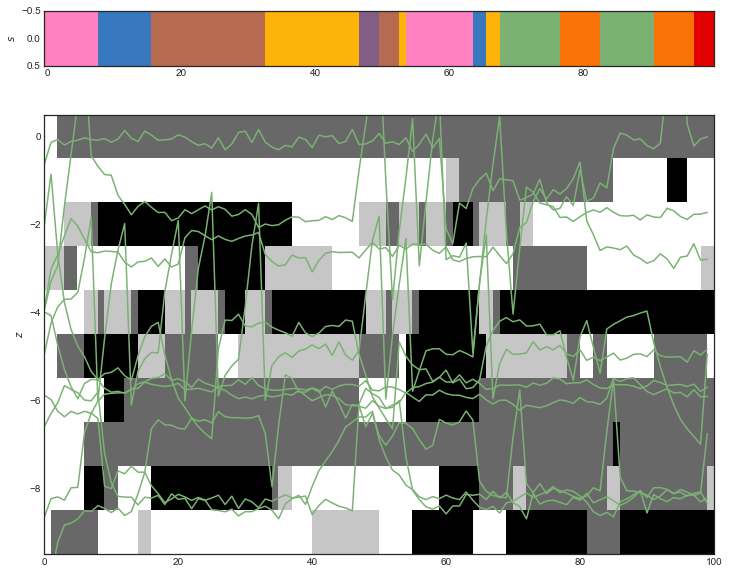

In [6]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(12, 10))
gs = GridSpec(2, 1, height_ratios=[1, 8])

plt.subplot(gs[0])
plt.imshow(s[None, :], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors) -1)
plt.ylabel("$s$")

plt.subplot(gs[1])
plt.imshow(z.T, aspect="auto", cmap="Greys", extent=(0, T, -N+.5, 0.5))
plt.plot(y - np.arange(N), color=colors[3])
plt.ylim(-N+.5, .5)
plt.ylabel("$z$")

In [7]:
shmm.log_probability([(s, z)], [y], [np.zeros((T, M))], [np.ones_like(y, dtype=bool)], [None] )

-426.20058023160607

In [8]:
s_smpl, z_smpl = shmm._gibbs(y, np.zeros((T, M)), np.ones_like(y, dtype=bool), None)

Text(0,0.5,'$s$')

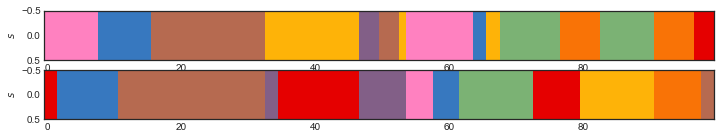

In [9]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(12, 2))
gs = GridSpec(2, 1)

plt.subplot(gs[0])
plt.imshow(s[None, :], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors) -1)
plt.ylabel("$s$")

plt.subplot(gs[1])
plt.imshow(s_smpl[None, :], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors) -1)
plt.ylabel("$s$")


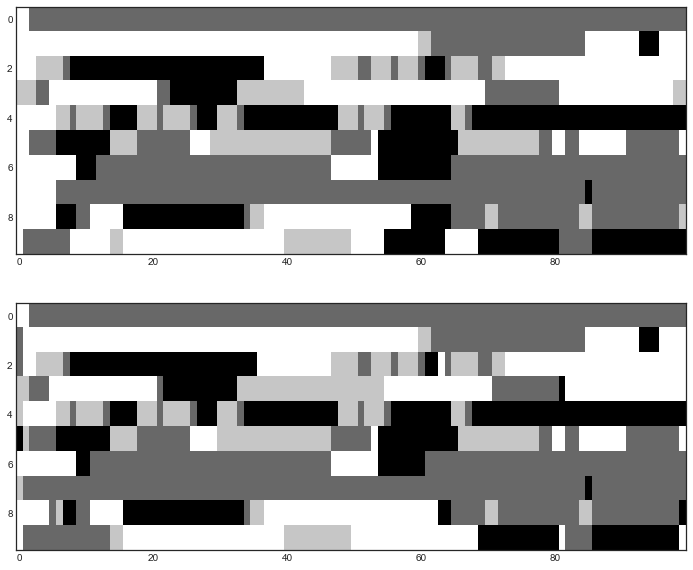

In [10]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(12, 10))
gs = GridSpec(2, 1)

plt.subplot(gs[0])
plt.imshow(z.T, aspect="auto", cmap="Greys", vmin=0, vmax=C-1)

plt.subplot(gs[1])
plt.imshow(z_smpl.T, aspect="auto", cmap="Greys", vmin=0, vmax=C-1)

In [11]:
test_shmm = SuperHMM(K, C, N, M)

In [12]:
# from copy import deepcopy
# test_shmm.params = deepcopy(shmm.params)

In [13]:
lls = test_shmm.fit(y, method="stochastic_em", num_iters=100)

Initializing observation models...
Iteration 0.  LL: -274.60241121067946


/Users/scott/Projects/autograd/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration 0.  LL: -41.73913793371222
Iteration 0.  LL: -97.32570195491061
Iteration 0.  LL: -4.561537347119465
Iteration 0.  LL: -207.1252212993191
Iteration 0.  LL: -71.26804356429608
Iteration 0.  LL: -45.515664886773735
Iteration 0.  LL: 44.66378475364769
Iteration 0.  LL: -79.4094690977349
Iteration 0.  LL: -4.119268696997447
Done.

Iteration 0.  LL: -32518.337874436307
Iteration 1.  LL: -32495.308968805115
Iteration 2.  LL: -32507.124647987996
Iteration 3.  LL: -32499.697877712966
Iteration 4.  LL: -32500.432666544268
Iteration 5.  LL: -32482.73908874327
Iteration 6.  LL: -32483.422029553174
Iteration 7.  LL: -32528.86467979915
Iteration 8.  LL: -32476.00044049824
Iteration 9.  LL: -32506.44373642152
Iteration 10.  LL: -32500.89182011517
Iteration 11.  LL: -32481.64725135235
Iteration 12.  LL: -32494.586352104758
Iteration 13.  LL: -32487.087761315295
Iteration 14.  LL: -32486.668932507502
Iteration 15.  LL: -32482.714589217518
Iteration 16.  LL: -32471.76518096151
Iteration 17.  

In [14]:
s_smpl, z_smpl = test_shmm._gibbs(y, np.zeros((T, M)), np.ones_like(y, dtype=bool), None)

Text(0,0.5,'$s$')

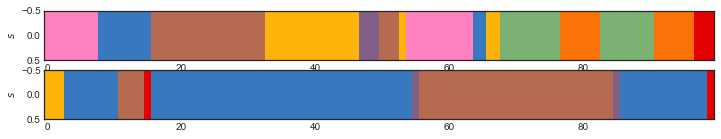

In [15]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(12, 2))
gs = GridSpec(2, 1)

plt.subplot(gs[0])
plt.imshow(s[None, :], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors) -1)
plt.ylabel("$s$")

plt.subplot(gs[1])
plt.imshow(s_smpl[None, :], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors) -1)
plt.ylabel("$s$")

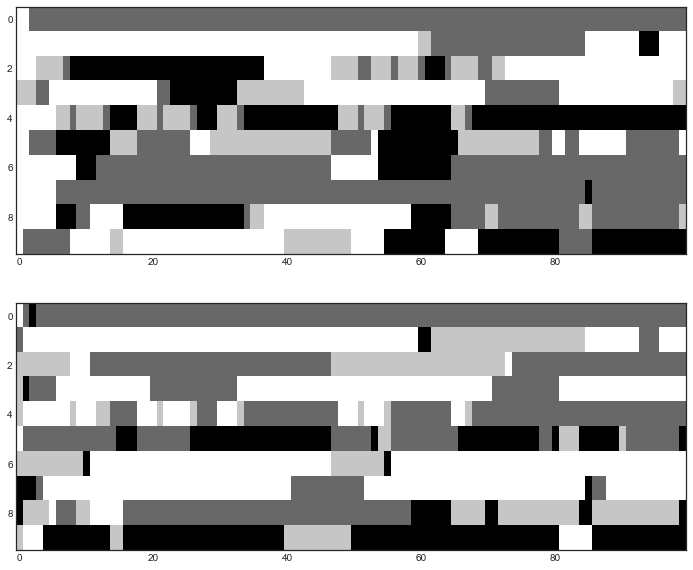

In [16]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(12, 10))
gs = GridSpec(2, 1)

plt.subplot(gs[0])
plt.imshow(z.T, aspect="auto", cmap="Greys", vmin=0, vmax=C-1)

plt.subplot(gs[1])
plt.imshow(z_smpl.T, aspect="auto", cmap="Greys", vmin=0, vmax=C-1)